# Data
    piece of informations

## Types of Data
    1. Continuous
    2. Discrete 
    3. Categorical

## Correlations
 **analysing the relationship between two different variables**
 1. Negative Correlation
 2. Positive Correlation
 3. No Correlation or Neutral

Text(0.5, 1.0, 'Neutral Correlations')

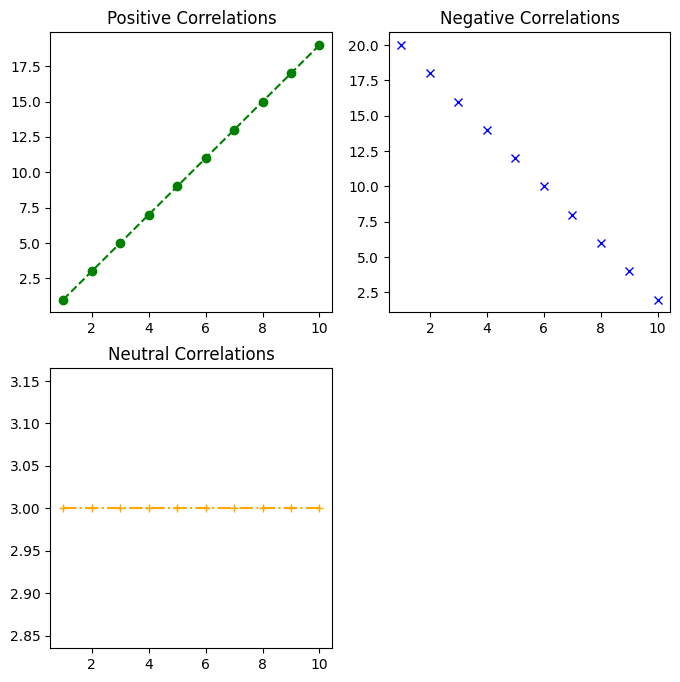

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

data = pd.DataFrame({
    'x': np.arange(1,11),
    'y1': np.arange(1, 20, 2),
    'y2': np.arange(20, 1, -2),
    'y3': np.ones(10)*3
})

plt.figure(figsize=(8, 8))
ax = plt.subplot(221)
ax.plot(data['x'], data['y1'], "go--")
ax.set_title("Positive Correlations")
ax = plt.subplot(222)
ax.plot(data['x'], data['y2'], "bx")
ax.set_title("Negative Correlations")
ax = plt.subplot(223)
ax.plot(data['x'], data['y3'], color='orange', linestyle='dashdot', marker='+')
ax.set_title("Neutral Correlations")


***Spearman's Correlation denoted by r*** `-1 to 1`


In [2]:
data.corr()

,x,y1,y2,y3
x,1.0,1.0,-1.0,NaN
y1,1.0,1.0,-1.0,NaN
y2,-1.0,-1.0,1.0,NaN
y3,NaN,NaN,NaN,NaN


## Covariance

In [3]:
data.cov()

,x,y1,y2,y3
x,9.166667,18.333333,-18.333333,0.0
y1,18.333333,36.666667,-36.666667,0.0
y2,-18.333333,-36.666667,36.666667,0.0
y3,0.000000,0.000000,0.000000,0.0


## Data Distribution

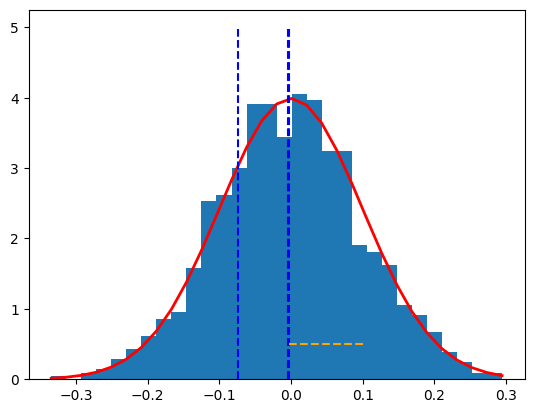

In [14]:
from statistics import mode, median

mu, sigma = 0, 0.1
x = np.random.normal(mu, sigma, 1000)
count, bins, _ = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.vlines([x.mean(), mode(x), median(x) ], 0, 5, colors='b', linestyles='dashed')


### List out types of Distribution `(Assignment)`

<img src="./dist.png">

In [15]:
np.log(1)

0.0

In [17]:
np.exp(0)

1.0

In [20]:
np.exp(np.log(50))

49.99999999999999

C:\Users\Navazdeen S\AppData\Local\Temp\ipykernel_11248\370070850.py:5: RuntimeWarning: invalid value encountered in log
  np.log( - (bins - mu)**2 / (2 * sigma**2) ),


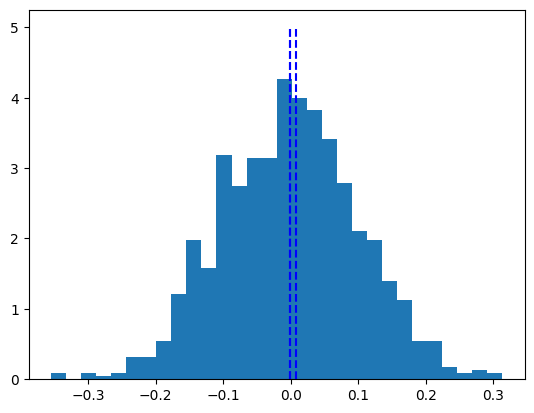

In [21]:
mu, sigma = 0, 0.1
x = np.random.normal(mu, sigma, 1000)
count, bins, _ = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.log( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.vlines([x.mean(), mode(x), median(x) ], 0, 5, colors='b', linestyles='dashed')

C:\Users\Navazdeen S\AppData\Local\Temp\ipykernel_11248\3305683643.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


(array([ 2.,  0.,  1.,  2.,  3.,  1.,  4.,  9.,  7., 14., 13., 39., 26.,
        40., 45., 90., 93., 70., 31.,  4.]),
 array([-8.24413176, -7.88284674, -7.52156173, -7.16027671, -6.7989917 ,
        -6.43770668, -6.07642166, -5.71513665, -5.35385163, -4.99256662,
        -4.6312816 , -4.26999659, -3.90871157, -3.54742655, -3.18614154,
        -2.82485652, -2.46357151, -2.10228649, -1.74100148, -1.37971646,
        -1.01843145]),
 <BarContainer object of 20 artists>)

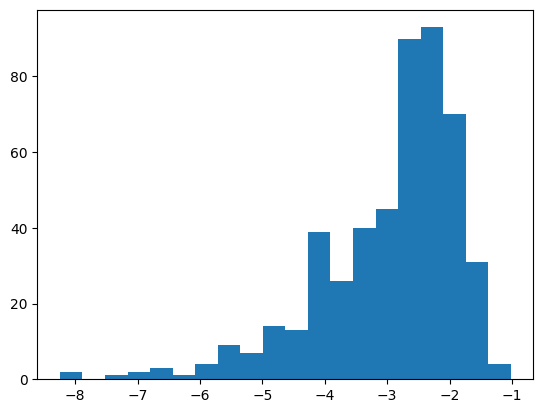

In [24]:
x = np.random.normal(mu, sigma, 1000)
y = np.log(x)

plt.hist(y, bins=20)

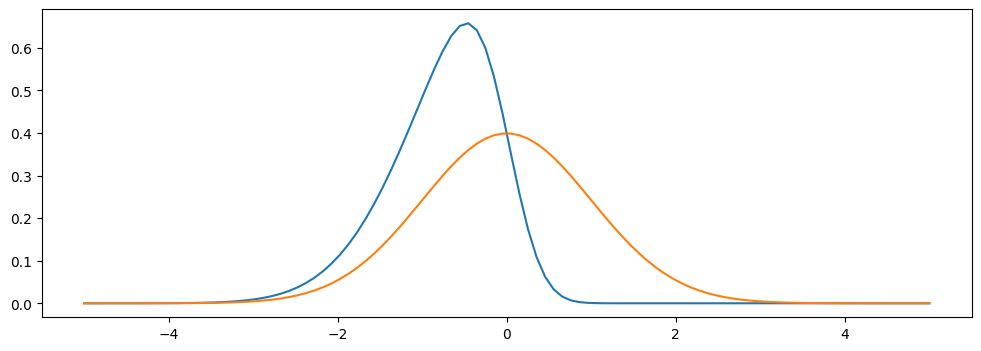

     -------------------------------------- 42.2/42.2 MB 768.8 kB/s eta 0:00:00


In [26]:
from scipy import stats

NUM_SAMPLES = 100000
SKEW_PARAMS = [-3, 0]

def skew_norm_pdf(x,e=0,w=1,a=0):
    # adapated from:
    # http://stackoverflow.com/questions/5884768/skew-normal-distribution-in-scipy
    t = (x-e) / w
    return 2.0 * w * stats.norm.pdf(t) * stats.norm.cdf(a*t)

# generate the skew normal PDF for reference:
location = 0.0
scale = 1.0
x = np.linspace(-5,5,100) 

plt.subplots(figsize=(12,4))
for alpha_skew in SKEW_PARAMS:
    p = skew_norm_pdf(x,location,scale,alpha_skew)
    # n.b. note that alpha is a parameter that controls skew, but the 'skewness'
    # as measured will be different. see the wikipedia page:
    # https://en.wikipedia.org/wiki/Skew_normal_distribution
    plt.plot(x,p)

mean < median `left skewed`

mean > median `right skewed`

mean == median `normal`

### Confidence interval

$ accuracy = 1/confidence $